# Week4 - Lab

### Complete _todo_ parts in the following:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [2]:
def create_df():
    df = pd.DataFrame()
    n = 10000
    x = np.linspace(0, 2*np.pi, n)
    y = 2*np.cosh(x/2) + np.random.normal(0, 3, n)

    x2 = random.choices(['A', 'B'], k=n)

    df['X1'] = x
    df['X2'] = x2
    df['y'] = [ y + 5 if b == 'A' else  y for y, b in zip(y, x2)]
    return df

df = create_df()

In [3]:
df.head()

,X1,X2,y
0,0.000000,B,0.314277
1,0.000628,A,6.442367
2,0.001257,A,8.528393
3,0.001885,B,5.004927
4,0.002514,A,4.172597


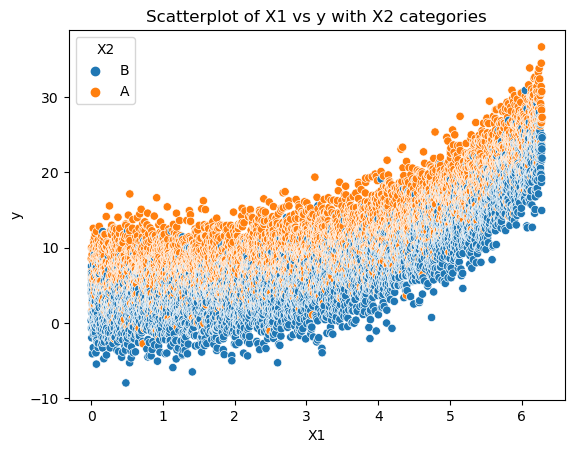

In [4]:
# todo: add a proper title

sns.scatterplot(data=df, x='X1', y='y', hue='X2')
plt.title('Scatterplot of X1 vs y with X2 categories')
plt.show()

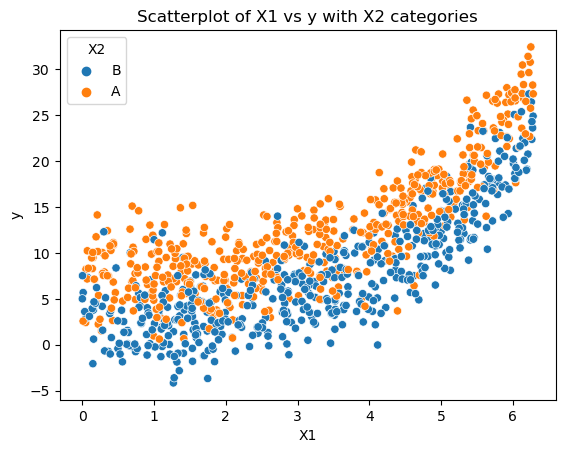

In [5]:
# todo: add the same title as above
#sns.scatterplot(data=df.sample(1000), x='X1', y='y', hue='X2')
plt.title('Scatterplot of X1 vs y with X2 categories')
sns.scatterplot(data=df.sample(1000), x='X1', y='y', hue='X2')
plt.show()

#### Todo: 
explain findings in the graphs

- Relationship between x1 and y
- points in different regions of the plot indicates the distribution of data.

In [6]:
X = df[['X1', 'X2']]
y = df.y

In [7]:
X.head()

,X1,X2
0,0.000000,B
1,0.000628,A
2,0.001257,A
3,0.001885,B
4,0.002514,A


In [8]:
model = LinearRegression()
model.fit(X[['X1']], y)

model.score(X[['X1']], y) 

0.5772942016047147

In [9]:
y_pred = model.predict(X[['X1']])
r2_score( y, y_pred)

0.5772942016047147

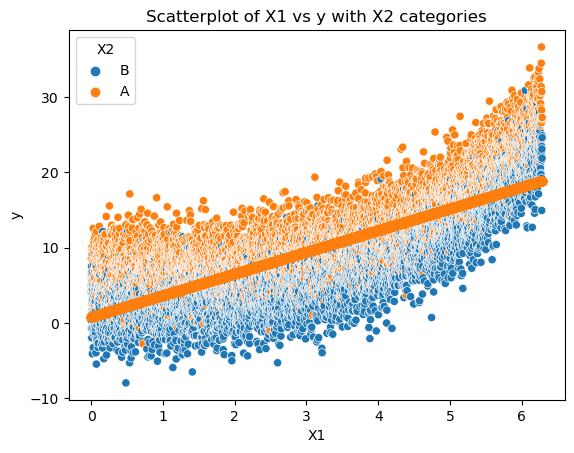

In [10]:
# if you want to see the difference between the below plot,
#  uncomment the next 2 lines & comment the other lines.
#  (leave these commented when submitting)
#plt.scatter(X.X1, y) 
#plt.scatter(X.X1, y_pred)

# todo: add a proper title
plt.title('Scatterplot of X1 vs y with X2 categories')
sns.scatterplot(data=df, x='X1', y='y', hue='X2') 
plt.scatter(X.X1, y_pred)

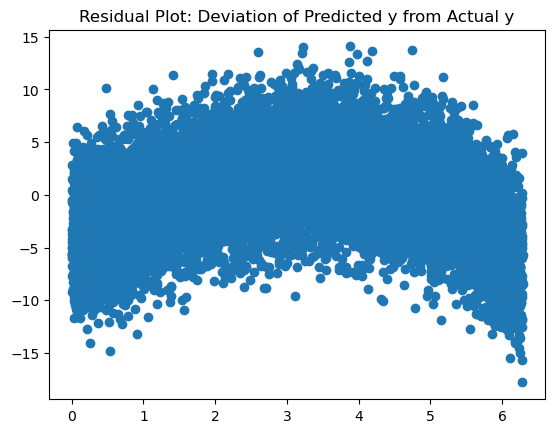

In [11]:
# todo: add a proper title
plt.title('Residual Plot: Deviation of Predicted y from Actual y')
plt.scatter(X.X1, y_pred-y)
plt.show()

<Axes: title={'center': 'Histogram of Residuals (Predicted y - Actual y)'}>

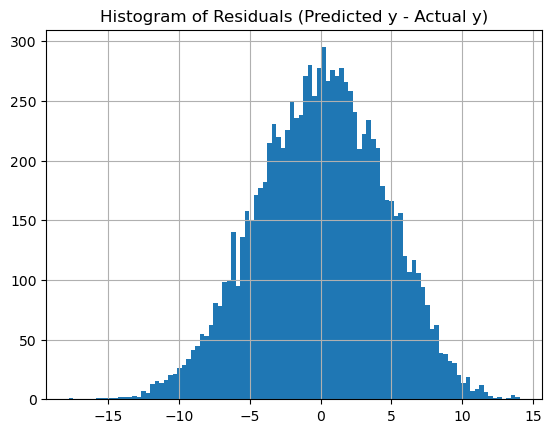

In [12]:
# todo: add a proper title
plt.title('Histogram of Residuals (Predicted y - Actual y)')
(y_pred-y).hist(bins=100)

#### Todo: 
Explain findings in the graphs above & what we can try next

In [13]:
# todo: explain the code below, what we do & why we do it? 

transform = PolynomialFeatures(degree=2)

X_data = transform.fit_transform(X[['X1']])

model = LinearRegression()
model.fit(X_data, y)

model.score(X_data, y) 

0.6756361629006873

In [14]:
y_pred = model.predict(X_data)
r2_score(y, y_pred)

0.6756361629006873

fits a linear regression model to predict the target variable y using these polynomial features, and evaluates the model's performance using the R² score.

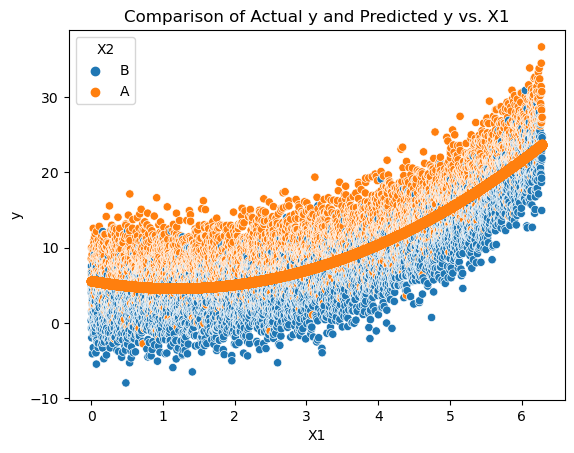

In [15]:
# if you want to see the difference between the below plot,
#  uncomment the next 2 lines & comment the other lines.
#  (leave these commented when submitting)
#plt.scatter(X_data[:, 1], y)
#plt.scatter(X_data[:, 1], y_pred)


# todo: add a proper title

sns.scatterplot(data=df, x='X1', y='y', hue='X2')
plt.scatter(X.X1, y_pred)
plt.title('Comparison of Actual y and Predicted y vs. X1')
plt.show()

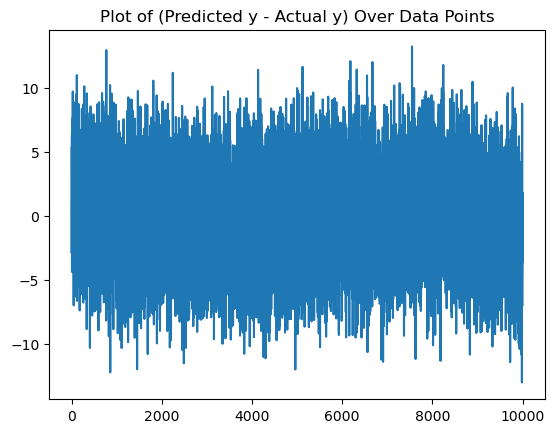

In [16]:
# todo: add a proper title

(y_pred-y).plot()
plt.title('Plot of (Predicted y - Actual y) Over Data Points')
plt.show()

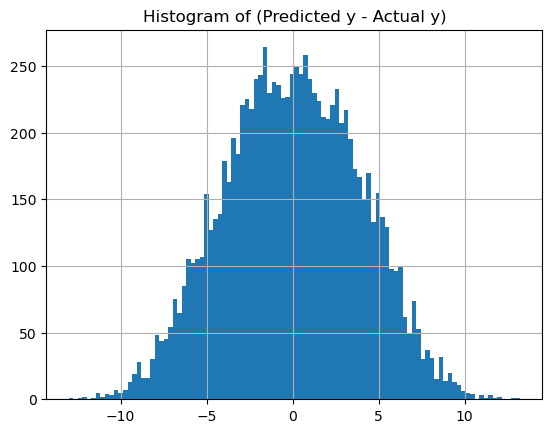

In [17]:
# todo: add a proper title

(y_pred-y).hist(bins=100)
plt.title('Histogram of (Predicted y - Actual y)')
plt.show()


### Todo:
Explain findings in the above graphs & what can we do next? 

##  Finally:

In [18]:
## to see the difference
# encoder = OneHotEncoder()

# categorical_features = ['X2']
# encoded = encoder.fit_transform(X[categorical_features])

# pd.DataFrame(
#     data=encoded.todense(), 
#     columns=encoder.get_feature_names_out()
# ).head()

In [19]:
encoder = OneHotEncoder(drop='first')

categorical_features = ['X2']
encoded = encoder.fit_transform(X[categorical_features])

In [20]:
encoded_df = pd.DataFrame(
    data=encoded.todense(), 
    columns=encoder.get_feature_names_out()
)

In [21]:
encoded_df.head()

,X2_B
0,1.0
1,0.0
2,0.0
3,1.0
4,0.0


In [22]:
# todo: explain the code

numerical_features = ['X1']
X_new = X[numerical_features].join(encoded_df)
X_new.head()

,X1,X2_B
0,0.000000,1.0
1,0.000628,0.0
2,0.001257,0.0
3,0.001885,1.0
4,0.002514,0.0


By combining numerical and categorical features into a single dataset, you create a unified input that can be used to train machine learning models. This is often necessary because many machine learning algorithms expect the input data to be in a tabular format with numerical values.

In [24]:
# todo: explain the code

poly = PolynomailFeatures()
X_data = poly.fit_transform(X_new)

model = LinearRegression()
model.fit(X_data, y)

model.score(X_data, y) 

NameError: name 'PolynomailFeatures' is not defined

In [25]:
y_pred = model.predict(X_data)
r2_score(y, y_pred)

0.6756361629006873

The code performs polynomial regression by transforming the input features into polynomial features, fitting a linear regression model to the transformed data, and evaluating the model's performance. 

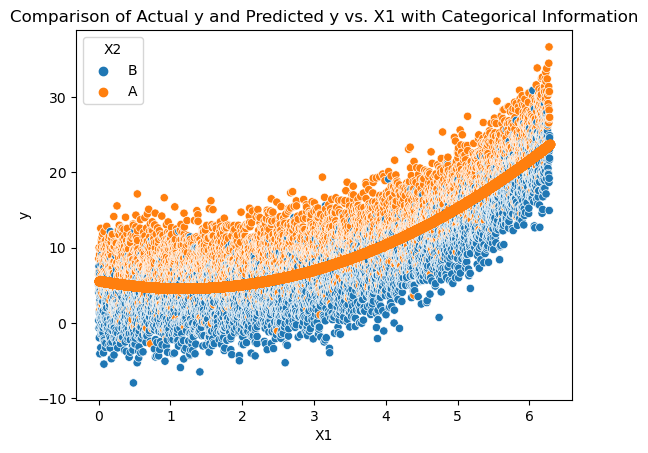

In [26]:
# if you want to see the difference between the below plot,
#  uncomment the next 2 lines & comment the other lines.
#  (leave these commented when submitting)
#plt.scatter(X_new.X1, y)
#plt.scatter(X_new.X1, y_pred)

# todo: add a proper title

sns.scatterplot(data=df, x='X1', y='y', hue='X2') 
plt.scatter(X_new.X1, y_pred)
plt.title('Comparison of Actual y and Predicted y vs. X1 with Categorical Information')
plt.show()

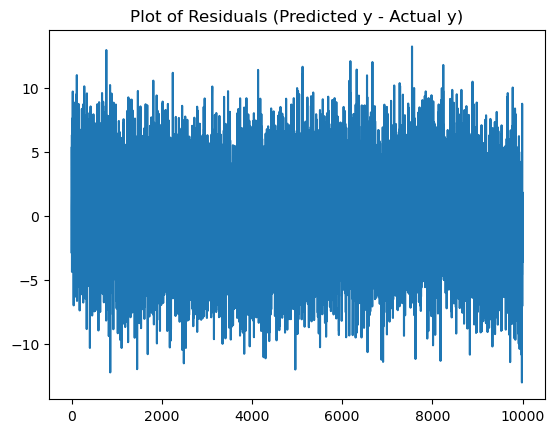

In [27]:
# todo: add a proper title

(y_pred-y).plot()
plt.title('Plot of Residuals (Predicted y - Actual y)')
plt.show()


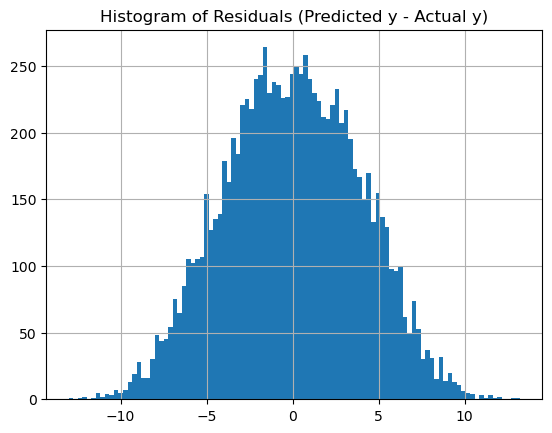

In [28]:
# todo: add a proper title

(y_pred-y).hist(bins=100)
plt.title('Histogram of Residuals (Predicted y - Actual y)')
plt.show()


#### Todo: 
explain results

-- Shows the distribution of the differences between the predicted values and the actual values
--  As there is a deviations from normality, it suggests that the model may have systematic errors.

## Create a train-test split

In [29]:
# code

X_training, X_test, y_training, y_test = train_test_split(X, y, test_size=0.2, random_state=17)


print(f'Training samples: {X_training.shape[0]:,}')
print(f'Test samples: {X_test.shape[0]:,}')

Training samples: 8,000
Test samples: 2,000


 ## Train a linear regression model
  
 * Perform the model training on training set, follow the steps after `Finally` on the training set. 
 * Get the r2_score on the test set.
 
 Important note: When transforming use `transform` NOT `fit_transform` 
 
 __eg:__ `encoded = encoder.transform(X_test[categorical_features])`
     

In [30]:
# code
from sklearn.metrics import r2_score

model_pipeline.fit(X_training, y_training)

X_training_transformed = model_pipeline.named_steps['data_processing'].transform(X_training)

y_pred_test = model_pipeline.predict(X_test)

r2= r2_score(y_test, y_pred_test)
print("R2 score:",r2)

NameError: name 'model_pipeline' is not defined

## Create a pipeline

Add comments to `todo` parts

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression

cat_vars = ['X2']
num_vars = ['X1']

# define pipeline for numerical features
num_pline = Pipeline([
    ('polynomial_features', PolynomialFeatures(degree=2))
])

# define pipeline for categorical features
cat_pline = Pipeline([
    ('create_dummies_cats', OneHotEncoder(handle_unknown='ignore', drop='first'))
])

# combine both pipelines using ColumnTransformer
processing_pipeline = ColumnTransformer(transformers=[
    ('num pipeline', num_pline, num_vars),
    ('cat pipeline', cat_pline, cat_vars)
])

model_pipeline = Pipeline([('data_processing', processing_pipeline), 
                              ('lm', LinearRegression())
                             ])

print(model_pipeline)

Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('num pipeline',
                                                  Pipeline(steps=[('polynomial_features',
                                                                   PolynomialFeatures())]),
                                                  ['X1']),
                                                 ('cat pipeline',
                                                  Pipeline(steps=[('create_dummies_cats',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['X2'])])),
                ('lm', LinearRegression())])


In [32]:
model_pipeline.fit(X_training, y_training)

Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('num pipeline',
                                                  Pipeline(steps=[('polynomial_features',
                                                                   PolynomialFeatures())]),
                                                  ['X1']),
                                                 ('cat pipeline',
                                                  Pipeline(steps=[('create_dummies_cats',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['X2'])])),
                ('lm', LinearRegression())])

In [33]:
model_pipeline.score(X_test, y_test)

0.802628495223508

## Evaluate/create residual plots

In [34]:
y_pred = model_pipeline.predict(X_test)

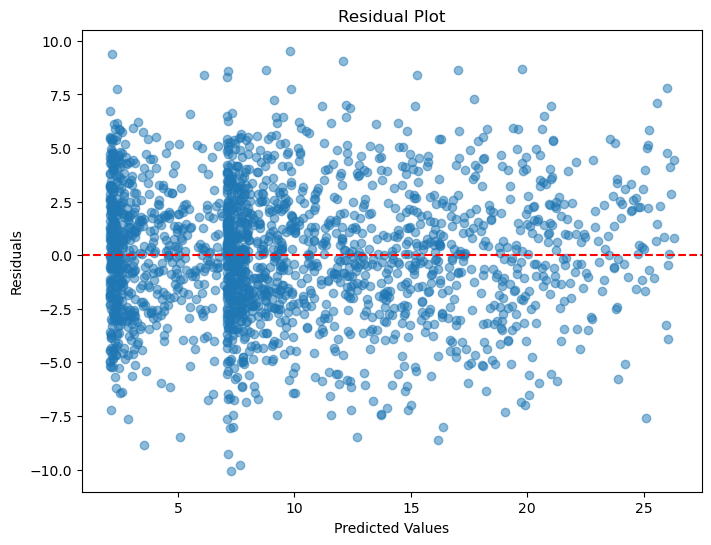

In [35]:
# code
residuals = y_test - y_pred


plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

## Explain findings

Residuals are scattered randomly around the zero line. 
This suggests that the errors are distributed evenly across the range of predicted values.